In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import seaborn as sns
import clean1

##### Read in Raw Data

In [41]:
raw = pd.read_csv('data/Ames_Housing_Price_Data.csv', index_col=0 )

In [42]:
raw.reset_index(inplace=True)

In [43]:
raw.head()

,index,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


#### Test Train Split

In [44]:
from sklearn.model_selection import train_test_split

X = raw.drop('SalePrice', axis=1)
y = raw.SalePrice

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=7)

#### Run Clean script to deal with missingness

In [45]:
Xtrain_c = clean1.clean(Xtrain.copy())
Xtest_c = clean1.clean(Xtest.copy()) # for Xtest as well

### Removing outliers in GrLivArea (2 data points > 5 std ~3936)

In [46]:
Xtrain_c.head()
#Xtrain_c.shape

,index,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
997,998,1728,90,RL,98.00000,13260,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.0,3,3,CBlock,3,3,No,BLQ,1500.0,Unf,0.0,228.0,1728.0,GasA,3,Y,SBrkr,1728,0,0,2.0,0.0,2,0,6,2,3,10,Typ,0,0,None,1977.5,None,0.0,0.0,0,0,Y,0,0,0,0,0,0,0,None,None,0,1,2010,Oth,Abnorml
381,382,1262,20,RL,80.00000,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,5,Y,SBrkr,1262,0,0,0.0,1.0,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2.0,460.0,3,3,Y,298,0,0,0,0,0,0,None,None,0,5,2007,WD,Normal
1077,78,1086,80,RL,85.00000,13400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,BrkFace,1047.0,3,3,CBlock,3,3,Av,ALQ,516.0,BLQ,128.0,380.0,1024.0,GasA,3,Y,SBrkr,1086,0,0,1.0,0.0,1,0,3,1,3,6,Typ,1,4,Attchd,1966.0,RFn,2.0,484.0,3,3,Y,0,0,0,0,0,0,0,GdWo,None,0,6,2006,WD,Normal
416,417,2582,60,RL,74.00000,11002,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,3,No,GLQ,1048.0,Unf,0.0,341.0,1389.0,GasA,5,Y,SBrkr,1411,1171,0,1.0,0.0,2,1,4,1,4,9,Typ,1,3,Attchd,1998.0,Fin,3.0,758.0,3,3,Y,286,60,0,0,0,0,0,None,None,0,1,2007,WD,Normal
1377,378,1652,20,RL,68.62847,22002,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1959,1991,Gable,CompShg,MetalSd,MetalSd,BrkFace,136.0,3,4,CBlock,3,3,Mn,ALQ,1386.0,Unf,0.0,206.0,1592.0,GasA,4,Y,SBrkr,1652,0,0,1.0,0.0,1,1,3,1,4,6,Typ,1,4,Attchd,1959.0,RFn,2.0,510.0,3,3,Y,0,0,0,0,201,0,0,None,None,0,7,2007,WD,Normal


In [47]:
# Removing outliers in GrLivArea (2 data points > 5 std ~3936)

threshold = (np.mean(Xtrain_c.GrLivArea) + 5*np.std(Xtrain_c.GrLivArea))
idx = Xtrain_c[Xtrain_c.GrLivArea > threshold].index
idx

Int64Index([1007, 309], dtype='int64')

In [48]:
Xtrain_c.drop(idx, inplace=True)
ytrain.drop(idx, inplace=True)

In [49]:
Xtrain_c.shape

(2062, 80)

In [50]:
Xtrain_c.drop('index', axis=1, inplace=True)

In [51]:
Xtrain_c.head()

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
997,1728,90,RL,98.00000,13260,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.0,3,3,CBlock,3,3,No,BLQ,1500.0,Unf,0.0,228.0,1728.0,GasA,3,Y,SBrkr,1728,0,0,2.0,0.0,2,0,6,2,3,10,Typ,0,0,None,1977.5,None,0.0,0.0,0,0,Y,0,0,0,0,0,0,0,None,None,0,1,2010,Oth,Abnorml
381,1262,20,RL,80.00000,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,5,Y,SBrkr,1262,0,0,0.0,1.0,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2.0,460.0,3,3,Y,298,0,0,0,0,0,0,None,None,0,5,2007,WD,Normal
1077,1086,80,RL,85.00000,13400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,BrkFace,1047.0,3,3,CBlock,3,3,Av,ALQ,516.0,BLQ,128.0,380.0,1024.0,GasA,3,Y,SBrkr,1086,0,0,1.0,0.0,1,0,3,1,3,6,Typ,1,4,Attchd,1966.0,RFn,2.0,484.0,3,3,Y,0,0,0,0,0,0,0,GdWo,None,0,6,2006,WD,Normal
416,2582,60,RL,74.00000,11002,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,3,No,GLQ,1048.0,Unf,0.0,341.0,1389.0,GasA,5,Y,SBrkr,1411,1171,0,1.0,0.0,2,1,4,1,4,9,Typ,1,3,Attchd,1998.0,Fin,3.0,758.0,3,3,Y,286,60,0,0,0,0,0,None,None,0,1,2007,WD,Normal
1377,1652,20,RL,68.62847,22002,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1959,1991,Gable,CompShg,MetalSd,MetalSd,BrkFace,136.0,3,4,CBlock,3,3,Mn,ALQ,1386.0,Unf,0.0,206.0,1592.0,GasA,4,Y,SBrkr,1652,0,0,1.0,0.0,1,1,3,1,4,6,Typ,1,4,Attchd,1959.0,RFn,2.0,510.0,3,3,Y,0,0,0,0,201,0,0,None,None,0,7,2007,WD,Normal


# Define Categorical and Numerical Features

In [68]:
def cat_num_group(df):
    """ Returns a list of numerical and categorical features,
    excluding SalePrice and Id. """
    # Numerical Features
    num_features = df.select_dtypes(include=['int64','float64']).columns

    # Categorical Features
    cat_features = df.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)

num_features, cat_features = cat_num_group(Xtrain_c)

# Boxplot to look at Categorical features

In [69]:
data = pd.concat([Xtrain_c, ytrain], axis=1)
data.head()

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
997,1728,90,RL,98.00000,13260,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.0,3,3,CBlock,3,3,No,BLQ,1500.0,Unf,0.0,228.0,1728.0,GasA,3,Y,SBrkr,1728,0,0,2.0,0.0,2,0,6,2,3,10,Typ,0,0,None,1977.5,None,0.0,0.0,0,0,Y,0,0,0,0,0,0,0,None,None,0,1,2010,Oth,Abnorml,84900
381,1262,20,RL,80.00000,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,5,Y,SBrkr,1262,0,0,0.0,1.0,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2.0,460.0,3,3,Y,298,0,0,0,0,0,0,None,None,0,5,2007,WD,Normal,181500
1077,1086,80,RL,85.00000,13400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,BrkFace,1047.0,3,3,CBlock,3,3,Av,ALQ,516.0,BLQ,128.0,380.0,1024.0,GasA,3,Y,SBrkr,1086,0,0,1.0,0.0,1,0,3,1,3,6,Typ,1,4,Attchd,1966.0,RFn,2.0,484.0,3,3,Y,0,0,0,0,0,0,0,GdWo,None,0,6,2006,WD,Normal,159950
416,2582,60,RL,74.00000,11002,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,3,No,GLQ,1048.0,Unf,0.0,341.0,1389.0,GasA,5,Y,SBrkr,1411,1171,0,1.0,0.0,2,1,4,1,4,9,Typ,1,3,Attchd,1998.0,Fin,3.0,758.0,3,3,Y,286,60,0,0,0,0,0,None,None,0,1,2007,WD,Normal,322500
1377,1652,20,RL,68.62847,22002,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1959,1991,Gable,CompShg,MetalSd,MetalSd,BrkFace,136.0,3,4,CBlock,3,3,Mn,ALQ,1386.0,Unf,0.0,206.0,1592.0,GasA,4,Y,SBrkr,1652,0,0,1.0,0.0,1,1,3,1,4,6,Typ,1,4,Attchd,1959.0,RFn,2.0,510.0,3,3,Y,0,0,0,0,201,0,0,None,None,0,7,2007,WD,Normal,200000


/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


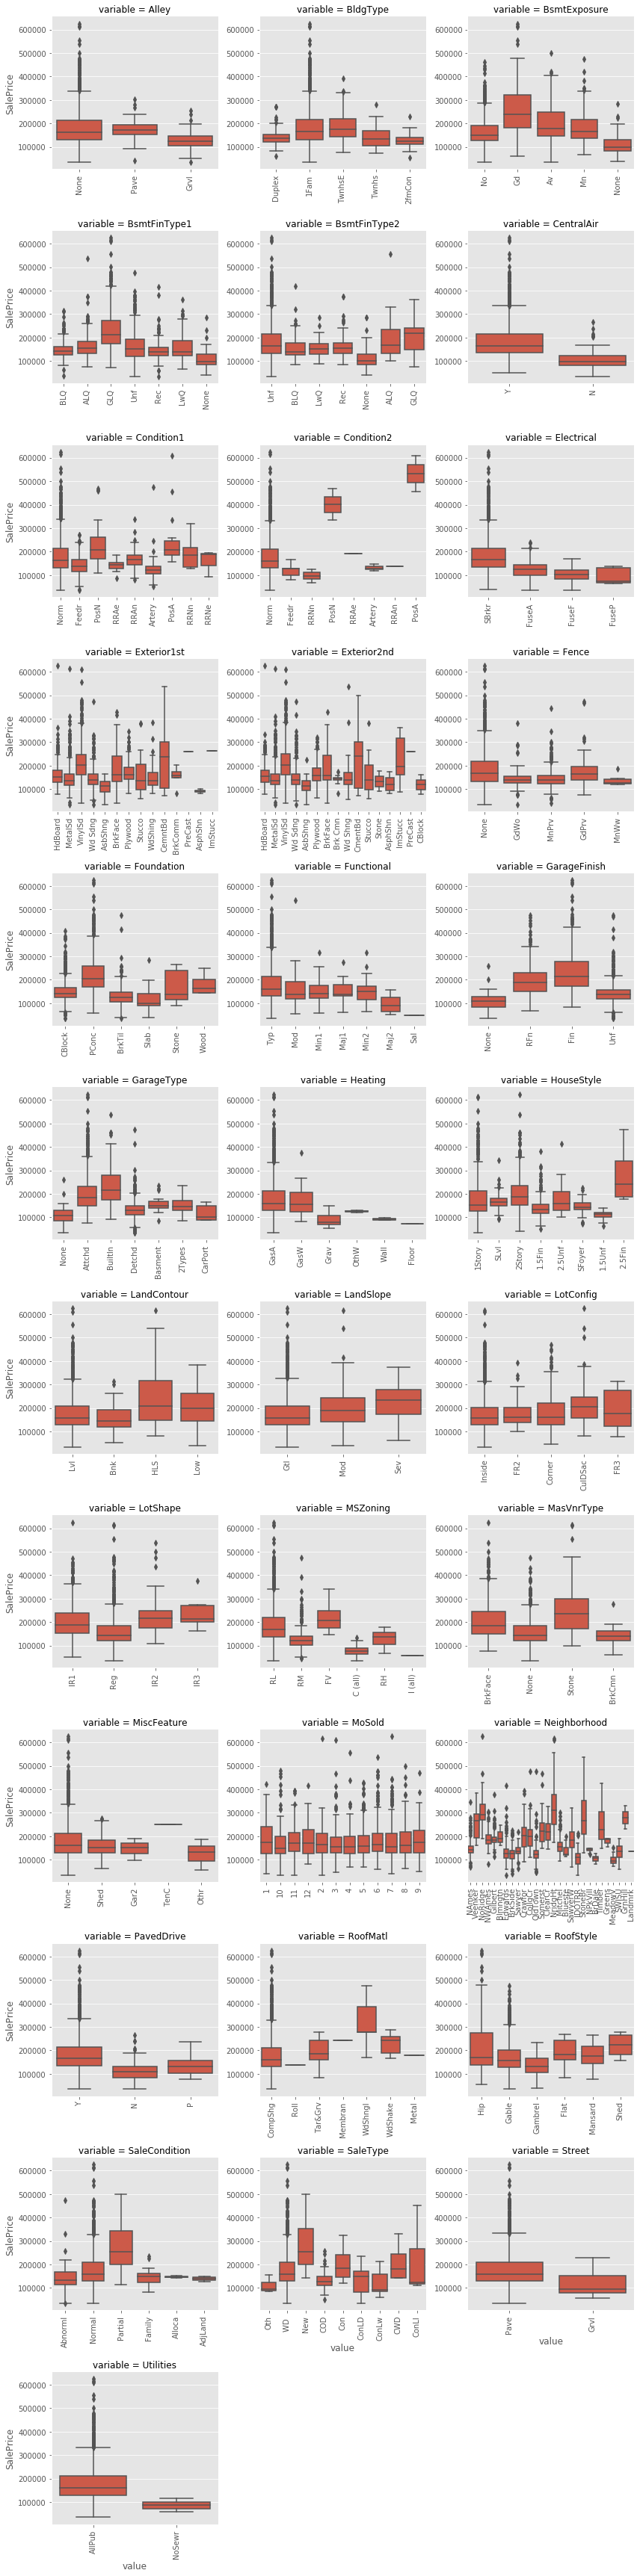

In [70]:
f = pd.melt(data, id_vars=['SalePrice'], value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

#### Grouping the categories based off boxplots above

In [ ]:
# Second cleaning grouping the categories
Xtrain_c2 = clean1.clean_category_var(Xtrain_c.copy())

In [ ]:
Xtrain_c2.head()

## Prepping data for R AIC BIC stepwise

In [ ]:
# changing yr features to age

Xtrain_c3 = clean1.transform_age(Xtrain_c2).drop(['YearRemodAdd','YearBuilt'], axis=1).copy()

In [ ]:
Xtrain_c3.head()

#### adding y column back to Xtrain

In [ ]:
rdata = pd.concat([Xtrain_c3, ytrain], axis=1)

In [ ]:
rdata.head()

In [ ]:
# write to csv
#rdata.to_csv("./data/cleanforR.csv",index_label = False)

#### Write csv of dummified features

In [ ]:
# dummify and drop first
Xtrain_dr = pd.get_dummies(Xtrain_c3, drop_first=True)

In [ ]:
rddata = pd.concat([Xtrain_dr, ytrain], axis=1)

In [ ]:
rddata = rddata.drop(['OverallQual','OverallCond'], axis=1)

In [ ]:
# write to csv

#rddata.to_csv("./data/cleanforRd.csv",index_label = False)

# Grid search CV Lasso

#### Dummify 

In [ ]:
Xtrain_d = pd.get_dummies(Xtrain_c2, drop_first=True)


In [ ]:
Xtrain_d.shape

In [ ]:
ytrain.shape

# grid search cv

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(normalize=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_param = [{'alpha': list(np.linspace(1e-4, 100, 100))}] # key of dictionary is parameter, value is range of values of hyperparameter
grid = GridSearchCV(estimator=lasso, param_grid=grid_param, cv=5, return_train_score=True,)
grid.fit(Xtrain_d, ytrain)

In [ ]:
grid.best_estimator_

In [ ]:
lasso2 = Lasso(normalize=True, alpha=2.0203)
lasso2.fit(Xtrain_d, ytrain) # fit data

In [ ]:
coef = pd.Series(lasso2.coef_, index = Xtrain_d.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 30.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

### This time with target log transformed

In [ ]:
# log transform target
ytrainlog=np.log(ytrain)

In [ ]:
lasso3 = Lasso(normalize=True, alpha=1e-4)
lasso3.fit(Xtrain_d, ytrainlog)

In [ ]:
coef = pd.Series(lasso3.coef_, index = Xtrain_d.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 30.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Log Price Lasso Model")

## Creating model from AIC BIC insights
- start with cleaning and reformatting data

In [94]:
# first cleaning done above
Xtrain_insight = Xtrain_c.copy()

In [95]:
# log price from above section Grid Search Lasso
# ytrainlog

#### Make total Area Feature and Drop all other Area Features

In [96]:
Xtrain_insight.head()

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
997,1728,90,RL,98.00000,13260,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.0,3,3,CBlock,3,3,No,BLQ,1500.0,Unf,0.0,228.0,1728.0,GasA,3,Y,SBrkr,1728,0,0,2.0,0.0,2,0,6,2,3,10,Typ,0,0,None,1977.5,None,0.0,0.0,0,0,Y,0,0,0,0,0,0,0,None,None,0,1,2010,Oth,Abnorml
381,1262,20,RL,80.00000,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,5,Y,SBrkr,1262,0,0,0.0,1.0,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2.0,460.0,3,3,Y,298,0,0,0,0,0,0,None,None,0,5,2007,WD,Normal
1077,1086,80,RL,85.00000,13400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,BrkFace,1047.0,3,3,CBlock,3,3,Av,ALQ,516.0,BLQ,128.0,380.0,1024.0,GasA,3,Y,SBrkr,1086,0,0,1.0,0.0,1,0,3,1,3,6,Typ,1,4,Attchd,1966.0,RFn,2.0,484.0,3,3,Y,0,0,0,0,0,0,0,GdWo,None,0,6,2006,WD,Normal
416,2582,60,RL,74.00000,11002,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,3,No,GLQ,1048.0,Unf,0.0,341.0,1389.0,GasA,5,Y,SBrkr,1411,1171,0,1.0,0.0,2,1,4,1,4,9,Typ,1,3,Attchd,1998.0,Fin,3.0,758.0,3,3,Y,286,60,0,0,0,0,0,None,None,0,1,2007,WD,Normal
1377,1652,20,RL,68.62847,22002,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1959,1991,Gable,CompShg,MetalSd,MetalSd,BrkFace,136.0,3,4,CBlock,3,3,Mn,ALQ,1386.0,Unf,0.0,206.0,1592.0,GasA,4,Y,SBrkr,1652,0,0,1.0,0.0,1,1,3,1,4,6,Typ,1,4,Attchd,1959.0,RFn,2.0,510.0,3,3,Y,0,0,0,0,201,0,0,None,None,0,7,2007,WD,Normal


In [97]:
# Hashed so doesnt run again but important
Xtrain_insight['TotalArea'] = Xtrain_insight['GrLivArea'] + Xtrain_insight['TotalBsmtSF'] + Xtrain_insight['GarageArea']

In [98]:
Xtrain_insight.head()

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalArea
997,1728,90,RL,98.00000,13260,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.0,3,3,CBlock,3,3,No,BLQ,1500.0,Unf,0.0,228.0,1728.0,GasA,3,Y,SBrkr,1728,0,0,2.0,0.0,2,0,6,2,3,10,Typ,0,0,None,1977.5,None,0.0,0.0,0,0,Y,0,0,0,0,0,0,0,None,None,0,1,2010,Oth,Abnorml,3456.0
381,1262,20,RL,80.00000,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,5,Y,SBrkr,1262,0,0,0.0,1.0,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2.0,460.0,3,3,Y,298,0,0,0,0,0,0,None,None,0,5,2007,WD,Normal,2984.0
1077,1086,80,RL,85.00000,13400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,BrkFace,1047.0,3,3,CBlock,3,3,Av,ALQ,516.0,BLQ,128.0,380.0,1024.0,GasA,3,Y,SBrkr,1086,0,0,1.0,0.0,1,0,3,1,3,6,Typ,1,4,Attchd,1966.0,RFn,2.0,484.0,3,3,Y,0,0,0,0,0,0,0,GdWo,None,0,6,2006,WD,Normal,2594.0
416,2582,60,RL,74.00000,11002,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,3,No,GLQ,1048.0,Unf,0.0,341.0,1389.0,GasA,5,Y,SBrkr,1411,1171,0,1.0,0.0,2,1,4,1,4,9,Typ,1,3,Attchd,1998.0,Fin,3.0,758.0,3,3,Y,286,60,0,0,0,0,0,None,None,0,1,2007,WD,Normal,4729.0
1377,1652,20,RL,68.62847,22002,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1959,1991,Gable,CompShg,MetalSd,MetalSd,BrkFace,136.0,3,4,CBlock,3,3,Mn,ALQ,1386.0,Unf,0.0,206.0,1592.0,GasA,4,Y,SBrkr,1652,0,0,1.0,0.0,1,1,3,1,4,6,Typ,1,4,Attchd,1959.0,RFn,2.0,510.0,3,3,Y,0,0,0,0,201,0,0,None,None,0,7,2007,WD,Normal,3754.0


In [99]:
# house_area_col=['GrLivArea','MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GarageArea', 'PoolArea', 'TotalArea']
# Xtrain_insight.drop(house_area_col, axis=1, inplace=True)
# Xtrain_insight.shape

In [100]:
Xtrain_insight.filter(regex='Bath').columns

Index(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], dtype='object')

In [101]:
# changing yr features to age

Xtrain_insight = clean1.transform_age(Xtrain_insight).drop(['YearRemodAdd','YearBuilt'], axis=1)

In [102]:
# Adding all bathrooms together

Xtrain_insight['TotalBath'] = Xtrain_insight['HalfBath']/2 + Xtrain_insight['BsmtFullBath'] + Xtrain_insight['BsmtHalfBath']/2 + Xtrain_insight['FullBath']

In [103]:
# Change wood deck to has or doesn't
Xtrain_insight['HasDeck'] = np.where(Xtrain_insight['WoodDeckSF']==0, 0, 1)
Xtrain_insight['NoPorch'] = Xtrain_insight.OpenPorchSF + Xtrain_insight.EnclosedPorch + Xtrain_insight['3SsnPorch'] + Xtrain_insight.ScreenPorch
Xtrain_insight['NoPorch'] = np.where(Xtrain_insight['NoPorch']==0, 1, 0)

In [104]:
Xtrain_insight.loc[Xtrain_insight.WoodDeckSF == 0].shape

(1064, 83)

In [105]:
Xtrain_insight.head()

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalArea,HouseAge,RemodelAge,TotalBath,HasDeck,NoPorch
997,1728,90,RL,98.00000,13260,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.0,3,3,CBlock,3,3,No,BLQ,1500.0,Unf,0.0,228.0,1728.0,GasA,3,Y,SBrkr,1728,0,0,2.0,0.0,2,0,6,2,3,10,Typ,0,0,None,1977.5,None,0.0,0.0,0,0,Y,0,0,0,0,0,0,0,None,None,0,1,2010,Oth,Abnorml,3456.0,48,9,4.0,0,1
381,1262,20,RL,80.00000,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,5,Y,SBrkr,1262,0,0,0.0,1.0,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2.0,460.0,3,3,Y,298,0,0,0,0,0,0,None,None,0,5,2007,WD,Normal,2984.0,31,31,2.5,1,1
1077,1086,80,RL,85.00000,13400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,1047.0,3,3,CBlock,3,3,Av,ALQ,516.0,BLQ,128.0,380.0,1024.0,GasA,3,Y,SBrkr,1086,0,0,1.0,0.0,1,0,3,1,3,6,Typ,1,4,Attchd,1966.0,RFn,2.0,484.0,3,3,Y,0,0,0,0,0,0,0,GdWo,None,0,6,2006,WD,Normal,2594.0,40,40,2.0,0,1
416,2582,60,RL,74.00000,11002,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,3,No,GLQ,1048.0,Unf,0.0,341.0,1389.0,GasA,5,Y,SBrkr,1411,1171,0,1.0,0.0,2,1,4,1,4,9,Typ,1,3,Attchd,1998.0,Fin,3.0,758.0,3,3,Y,286,60,0,0,0,0,0,None,None,0,1,2007,WD,Normal,4729.0,9,8,3.5,1,0
1377,1652,20,RL,68.62847,22002,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,Gable,CompShg,MetalSd,MetalSd,BrkFace,136.0,3,4,CBlock,3,3,Mn,ALQ,1386.0,Unf,0.0,206.0,1592.0,GasA,4,Y,SBrkr,1652,0,0,1.0,0.0,1,1,3,1,4,6,Typ,1,4,Attchd,1959.0,RFn,2.0,510.0,3,3,Y,0,0,0,0,201,0,0,None,None,0,7,2007,WD,Normal,3754.0,48,16,2.5,0,0


In [106]:
Xtrain_insight.loc[Xtrain_insight.NoPorch != 0].shape

(634, 83)

In [107]:
Xtrain_insight.BldgType.value_counts()

1Fam      1719
TwnhsE     154
Twnhs       74
Duplex      70
2fmCon      45
Name: BldgType, dtype: int64

In [108]:
# HouseStyle change to 1story vs rest
Xtrain_insight['MultStory'] = np.where(Xtrain_insight['HouseStyle']=='1Story', 0, 1)

In [109]:
# SaleCondition change to Partial Vs Rest
Xtrain_insight['PartialSale'] = np.where(Xtrain_insight['SaleCondition']=='Partial', 1, 0)

In [110]:
# Paved Driveway
Xtrain_insight['PavedDrive'] = np.where(Xtrain_insight['PavedDrive']=='Y', 1, 0)

In [111]:
Xtrain_insight['Neighborhood'] = np.where(Xtrain_insight['Neighborhood'].isin(['GrnHill', 'Greens', 'NridgHt', 'StoneBr', 'Veenker', 'Somerst',
       'Timber', 'CollgCr', 'Blmngtn']), "Tier_1", np.where(Xtrain_insight['Neighborhood'].isin(['Blmngtn', 'NoRidge', 'Mitchel', 'ClearCr',
       'Blueste', 'Sawyer', 'Crawfor', 'SawyerW', 'Gilbert', 'NPkVill']), "Tier_2", "Tier_3"))

In [112]:
Xtrain_insight.columns

Index(['GrLivArea', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'En

In [113]:
column_names = ['TotalArea','LotArea','Neighborhood','BldgType','ExterQual','BsmtQual','Heating','HeatingQC','CentralAir','BedroomAbvGr','KitchenQual','Fireplaces','GarageCars','GarageQual','PavedDrive','RemodelAge','HouseAge','TotalBath','HasDeck', 'NoPorch', 'MultStory', 'PartialSale']
Xtrain_i = Xtrain_insight[column_names].copy()

In [114]:
Xtrain_i['TotalArea'] = np.log(Xtrain_i['TotalArea'].copy())

In [115]:
Xtrain_i.head()

,TotalArea,LotArea,Neighborhood,BldgType,ExterQual,BsmtQual,Heating,HeatingQC,CentralAir,BedroomAbvGr,KitchenQual,Fireplaces,GarageCars,GarageQual,PavedDrive,RemodelAge,HouseAge,TotalBath,HasDeck,NoPorch,MultStory,PartialSale
997,8.147867,13260,Tier_3,Duplex,3,3,GasA,3,Y,6,3,0,0.0,0,1,9,48,4.0,0,1,0,0
381,8.001020,9600,Tier_1,1Fam,3,4,GasA,5,Y,3,3,1,2.0,3,1,31,31,2.5,1,1,0,0
1077,7.860956,13400,Tier_3,1Fam,3,3,GasA,3,Y,3,3,1,2.0,3,1,40,40,2.0,0,1,1,0
416,8.461469,11002,Tier_2,1Fam,4,4,GasA,5,Y,4,4,1,3.0,3,1,8,9,3.5,1,0,1,0
1377,8.230577,22002,Tier_3,1Fam,3,3,GasA,4,Y,3,4,1,2.0,3,1,16,48,2.5,0,0,0,0


In [116]:
rdata_i = pd.concat([Xtrain_i, ytrainlog], axis=1)

In [117]:
rdata_i.head()

,TotalArea,LotArea,Neighborhood,BldgType,ExterQual,BsmtQual,Heating,HeatingQC,CentralAir,BedroomAbvGr,KitchenQual,Fireplaces,GarageCars,GarageQual,PavedDrive,RemodelAge,HouseAge,TotalBath,HasDeck,NoPorch,MultStory,PartialSale,SalePrice
997,8.147867,13260,Tier_3,Duplex,3,3,GasA,3,Y,6,3,0,0.0,0,1,9,48,4.0,0,1,0,0,11.349229
381,8.001020,9600,Tier_1,1Fam,3,4,GasA,5,Y,3,3,1,2.0,3,1,31,31,2.5,1,1,0,0,12.109011
1077,7.860956,13400,Tier_3,1Fam,3,3,GasA,3,Y,3,3,1,2.0,3,1,40,40,2.0,0,1,1,0,11.982617
416,8.461469,11002,Tier_2,1Fam,4,4,GasA,5,Y,4,4,1,3.0,3,1,8,9,3.5,1,0,1,0,12.683858
1377,8.230577,22002,Tier_3,1Fam,3,3,GasA,4,Y,3,4,1,2.0,3,1,16,48,2.5,0,0,0,0,12.206073


In [118]:
rdata_i.to_csv("./data/cleanforR_i.csv",index_label = False)

In [119]:
# SalePrice ~ TotalArea + RemodelAge + Neighborhood + 
#     Fireplaces + CentralAir + KitchenQual + TotalBath + BldgType + 
#     ExterQual + PavedDrive + MultStory + LotArea + HouseAge + 
#     Exterior1st + HeatingQC + PartialSale + BedroomAbvGr + GarageQual,

In [120]:
# TotalArea + ExterQual + RemodelAge + 
#     Fireplaces + HouseAge + BldgType + TotalBath + KitchenQual + 
#     Neighborhood + CentralAir + LotArea + PavedDrive + MultStory + 
#     PartialSale + HeatingQC + BedroomAbvGr

### Now build multiple linear model

In [121]:
# create new Xtrain
column_names = ['TotalArea','Neighborhood','BldgType','ExterQual','BsmtQual','HeatingQC','CentralAir','BedroomAbvGr','KitchenQual','Fireplaces','GarageQual','PavedDrive','HouseAge','TotalBath', 'MultStory', 'PartialSale']
Xtrain_lm = Xtrain_insight[column_names].copy()

In [122]:
# then dummify
Xtrain_lmd = pd.get_dummies(Xtrain_lm, drop_first=True)

In [123]:
Xtrain_lmd.head()

,TotalArea,ExterQual,BsmtQual,HeatingQC,BedroomAbvGr,KitchenQual,Fireplaces,GarageQual,PavedDrive,HouseAge,TotalBath,MultStory,PartialSale,Neighborhood_Tier_2,Neighborhood_Tier_3,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,CentralAir_Y
997,3456.0,3,3,3,6,3,0,0,1,48,4.0,0,0,0,1,0,1,0,0,1
381,2984.0,3,4,5,3,3,1,3,1,31,2.5,0,0,0,0,0,0,0,0,1
1077,2594.0,3,3,3,3,3,1,3,1,40,2.0,1,0,0,1,0,0,0,0,1
416,4729.0,4,4,5,4,4,1,3,1,9,3.5,1,0,1,0,0,0,0,0,1
1377,3754.0,3,3,4,3,4,1,3,1,48,2.5,0,0,0,1,0,0,0,0,1


In [124]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(Xtrain_lmd, ytrainlog)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
lm.score(Xtrain_lmd, ytrainlog)

0.8770247930464667

### Using j_clean script

In [128]:
Xtrain_j = clean1.j_model_clean(Xtrain_c.copy())

In [129]:
Xtest_c = clean1.clean(Xtest.copy())
ytestlog = np.log(ytest)

In [130]:
Xtest_j = clean1.j_model_clean(Xtest_c.copy())

In [131]:
Xtrain_jd = pd.get_dummies(Xtrain_j, drop_first=True)

In [132]:
Xtest_jd = pd.get_dummies(Xtest_j, drop_first=True)

In [133]:
Xtrain_jd.head()

,TotalArea,ExterQual,BsmtQual,HeatingQC,BedroomAbvGr,KitchenQual,Fireplaces,GarageQual,PavedDrive,HouseAge,TotalBath,MultStory,PartialSale,Neighborhood_Tier_2,Neighborhood_Tier_3,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,CentralAir_Y
997,8.147867,3,3,3,6,3,0,0,1,48,4.0,0,0,0,1,0,1,0,0,1
381,8.001020,3,4,5,3,3,1,3,1,31,2.5,0,0,0,0,0,0,0,0,1
1077,7.860956,3,3,3,3,3,1,3,1,40,2.0,1,0,0,1,0,0,0,0,1
416,8.461469,4,4,5,4,4,1,3,1,9,3.5,1,0,1,0,0,0,0,0,1
1377,8.230577,3,3,4,3,4,1,3,1,48,2.5,0,0,0,1,0,0,0,0,1


In [134]:
Xtest_d.head()

NameError: name 'Xtest_d' is not defined

### Fitting multiple linear regression

In [135]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(Xtrain_jd, ytrainlog)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [136]:
lm.score(Xtrain_jd, ytrainlog)

0.8722437737426657

In [137]:
lm.score(Xtest_jd, ytestlog)

0.8205166333254057

In [138]:
for ftname, beta in zip(Xtrain_jd.columns, lm.coef_):
    print(f"{ftname} >> {beta}")

TotalArea >> 0.6145028010241987
ExterQual >> 0.07296915734625387
BsmtQual >> -0.009100811770245965
HeatingQC >> 0.015044642769668772
BedroomAbvGr >> -0.01601920648887351
KitchenQual >> 0.07699386644263051
Fireplaces >> 0.076751919531075
GarageQual >> -0.008523139862774302
PavedDrive >> 0.04651427514861074
HouseAge >> -0.0010336365163751834
TotalBath >> 0.05710531047917034
MultStory >> 0.03252599936895902
PartialSale >> 0.06702855252834856
Neighborhood_Tier_2 >> -0.027604724251852085
Neighborhood_Tier_3 >> -0.08984491556670614
BldgType_2fmCon >> -0.043478622114419115
BldgType_Duplex >> -0.11779296427221554
BldgType_Twnhs >> -0.14145720464640515
BldgType_TwnhsE >> -0.08285457381116253
CentralAir_Y >> 0.09313701656623616


In [139]:
# intercept is not paved, single story, regular sale, Top tier neighborhood, Single Family units
# Show absolute value to show rank of importance of coef
pd.Series(abs(lm.coef_) ,index = Xtrain_jd.columns).sort_values(ascending =False)

TotalArea              0.614503
BldgType_Twnhs         0.141457
BldgType_Duplex        0.117793
CentralAir_Y           0.093137
Neighborhood_Tier_3    0.089845
BldgType_TwnhsE        0.082855
KitchenQual            0.076994
Fireplaces             0.076752
ExterQual              0.072969
PartialSale            0.067029
TotalBath              0.057105
PavedDrive             0.046514
BldgType_2fmCon        0.043479
MultStory              0.032526
Neighborhood_Tier_2    0.027605
BedroomAbvGr           0.016019
HeatingQC              0.015045
BsmtQual               0.009101
GarageQual             0.008523
HouseAge               0.001034
dtype: float64

In [140]:
### See significance as well

In [141]:
import statsmodels.api as sm
x = sm.add_constant(Xtrain_lmd)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(ytrainlog, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     727.8
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:45:50   Log-Likelihood:                 1216.1
No. Observations:                2062   AIC:                            -2390.
Df Residuals:                    2041   BIC:                            -2272.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.6065    

#### CV scores for more accuracy

In [142]:
from sklearn.model_selection import cross_val_score

In [143]:
cv3_train=(cross_val_score(lm, Xtrain_jd, ytrainlog, cv=3))

In [144]:
cv3_train

array([0.86121761, 0.86588018, 0.87423923])

### MEAN AND SD jmodel CV

In [145]:
np.mean(cv3_train)

0.8671123412139803

In [146]:
np.std(cv3_train)

0.005386979937965986

#### Can we make the model even simpler?

In [147]:
from sklearn.linear_model import Lasso

In [148]:
lasso = Lasso(normalize=True, alpha=1e-4)
lasso.fit(Xtrain_jd, ytrainlog)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Text(0.5, 1.0, 'Feature importance Lasso JModel')

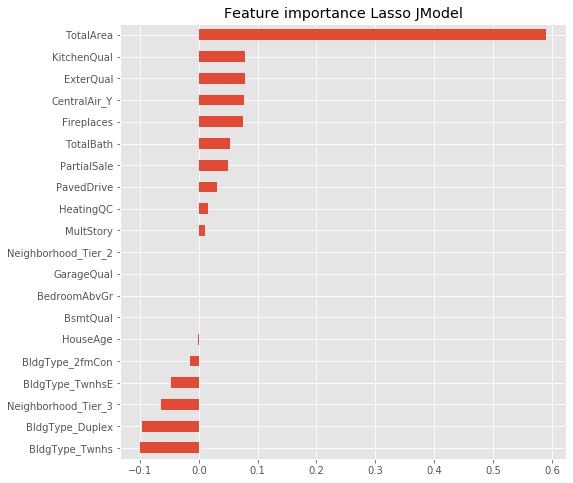

In [149]:
coef = pd.Series(lasso.coef_, index = Xtrain_jd.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 8.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance Lasso JModel")

In [150]:
Xtrain_jgen= Xtrain_jd.drop(Xtrain_jd.iloc[:, 13:20], axis = 1)
Xtest_jgen= Xtest_jd.drop(Xtest_jd.iloc[:, 13:20], axis = 1)

In [151]:
lm_gen = LinearRegression()
cv3_train_jgen=(cross_val_score(lm_gen, Xtrain_jgen, ytrainlog, cv=3))

In [152]:
cv3_train_jgen

array([0.8471167 , 0.85212359, 0.85571187])

### MEAN AND SD jgen CV

In [153]:
np.mean(cv3_train_jgen)

0.8516507210863479

In [154]:
np.std(cv3_train_jgen)

0.0035248589405199567

### Compare to test score

In [155]:
lm_gen.fit(Xtrain_jgen, ytrainlog)
lm_gen.score(Xtest_jgen, ytestlog)

0.8118791790543877

In [156]:
for ftname, beta in zip(Xtrain_jgen.columns, lm_gen.coef_):
    print(f"{ftname} >> {beta}")

TotalArea >> 0.6331033248256988
ExterQual >> 0.07664207785404714
BsmtQual >> 0.0005086396862536549
HeatingQC >> 0.028690079158472367
BedroomAbvGr >> -0.012002521181952419
KitchenQual >> 0.08232459352262633
Fireplaces >> 0.08710512703610856
GarageQual >> 0.004418124205370482
PavedDrive >> 0.04920471282142504
HouseAge >> -0.0015194649658619508
TotalBath >> 0.046323387053977844
MultStory >> 0.02580222120301565
PartialSale >> 0.07022385335174644


In [157]:
# Generalized simple model (across all house types and neighborhoods)
# Show absolute value to show rank of importance of coef
pd.Series(abs(lm_gen.coef_) ,index = Xtrain_jgen.columns).sort_values(ascending =False)

TotalArea       0.633103
Fireplaces      0.087105
KitchenQual     0.082325
ExterQual       0.076642
PartialSale     0.070224
PavedDrive      0.049205
TotalBath       0.046323
HeatingQC       0.028690
MultStory       0.025802
BedroomAbvGr    0.012003
GarageQual      0.004418
HouseAge        0.001519
BsmtQual        0.000509
dtype: float64

#### Use Lasso to generate Feature imp

In [158]:
lasso_gen = Lasso(normalize=True, alpha=1e-4)
lasso_gen.fit(Xtrain_jgen, ytrainlog)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Text(0.5, 1.0, 'Feature importance Lasso JgenModel')

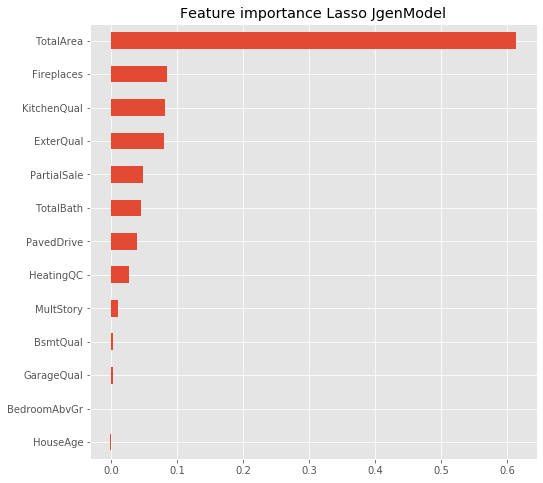

In [159]:
coef = pd.Series(lasso_gen.coef_, index = Xtrain_jgen.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 8.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance Lasso JgenModel")

In [160]:
x2 = sm.add_constant(Xtrain_jgen)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model2 = sm.OLS(ytrain, x2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     631.4
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:46:34   Log-Likelihood:                -24359.
No. Observations:                2062   AIC:                         4.875e+04
Df Residuals:                    2048   BIC:                         4.883e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -8.6e+05   2.81e+04    -30.626   

### Price by sqft - takeaway is the model becomes very unstable, will need to add more features

In [ ]:
Xtrain_jarea = Xtrain_jgen.drop('TotalArea', axis = 1)
Xtest_jarea = Xtest_jgen.drop('TotalArea', axis = 1)

In [ ]:
ytrain_jarea = ytrainlog/(Xtrain_jgen['TotalArea'])
ytest_jarea = ytestlog/(Xtrain_jgen['TotalArea'])

In [ ]:
ytrain_area.head()

In [ ]:
lm_area = LinearRegression()
cv3_train_jarea=(cross_val_score(lm_area, Xtrain_jarea, ytrain_jarea, cv=3))

In [ ]:
cv3_train_jarea

In [ ]:
np.mean(cv3_train_jarea)

In [ ]:
np.std(cv3_train_jarea)

## After Talk 

In [13]:
Xtrain_c.head()

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
997,1728,90,RL,98.00000,13260,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.0,3,3,CBlock,3,3,No,BLQ,1500.0,Unf,0.0,228.0,1728.0,GasA,3,Y,SBrkr,1728,0,0,2.0,0.0,2,0,6,2,3,10,Typ,0,0,None,1977.5,None,0.0,0.0,0,0,Y,0,0,0,0,0,0,0,None,None,0,1,2010,Oth,Abnorml
381,1262,20,RL,80.00000,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,5,Y,SBrkr,1262,0,0,0.0,1.0,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2.0,460.0,3,3,Y,298,0,0,0,0,0,0,None,None,0,5,2007,WD,Normal
1077,1086,80,RL,85.00000,13400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,BrkFace,1047.0,3,3,CBlock,3,3,Av,ALQ,516.0,BLQ,128.0,380.0,1024.0,GasA,3,Y,SBrkr,1086,0,0,1.0,0.0,1,0,3,1,3,6,Typ,1,4,Attchd,1966.0,RFn,2.0,484.0,3,3,Y,0,0,0,0,0,0,0,GdWo,None,0,6,2006,WD,Normal
416,2582,60,RL,74.00000,11002,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,3,No,GLQ,1048.0,Unf,0.0,341.0,1389.0,GasA,5,Y,SBrkr,1411,1171,0,1.0,0.0,2,1,4,1,4,9,Typ,1,3,Attchd,1998.0,Fin,3.0,758.0,3,3,Y,286,60,0,0,0,0,0,None,None,0,1,2007,WD,Normal
1377,1652,20,RL,68.62847,22002,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1959,1991,Gable,CompShg,MetalSd,MetalSd,BrkFace,136.0,3,4,CBlock,3,3,Mn,ALQ,1386.0,Unf,0.0,206.0,1592.0,GasA,4,Y,SBrkr,1652,0,0,1.0,0.0,1,1,3,1,4,6,Typ,1,4,Attchd,1959.0,RFn,2.0,510.0,3,3,Y,0,0,0,0,201,0,0,None,None,0,7,2007,WD,Normal


In [75]:
Xtrain_at = clean1.final_clean1(Xtrain_c.copy())
Xtest_at = clean1.final_clean1(Xtest_c.copy())

In [54]:
Xtrain_c.shape

(2062, 79)

In [55]:
ytrainlog = np.log(ytrain.copy())

In [56]:
rdata_atl = pd.concat([Xtrain_at, ytrainlog], axis=1)

In [57]:
rdata_at = pd.concat([Xtrain_at, ytrain], axis=1)

In [ ]:
#rdata_atl.to_csv('data/rdata_atl.csv', index_label=False)
#rdata_at.to_csv('data/rdata_at.csv', index_label=False)

 Lets try without logging target - want most interpretable model
SalePrice ~ ExterQual + X1stFlrSF + X2ndFlrSF + BsmtQual + GarageArea + 
    KitchenQual + Fireplaces + Neighborhood + BldgType + TotalBsmtSF + 
    BedroomAbvGr + TotalBath + PartialSale + HouseAge + WoodDeckSF + 
    GarageQual + PavedDrive + CentralAir

In [83]:
column_names = ['Neighborhood''BldgType','ExterQual','BsmtQual','CentralAir','BedroomAbvGr',
                    'KitchenQual','Fireplaces','GarageQual','PavedDrive','HouseAge','TotalBath',
                    'PartialSale','TotalBsmtSF','1stFlrSF','2ndFlrSF','GarageArea','WoodDeckSF']
Xtrain_at1 = Xtrain_at[column_names].copy()
Xtest_at1 = Xtest_at[column_names].copy()
Xtrain_at1 = pd.get_dummies(Xtrain_at, drop_first=True)
Xtest_at1 = pd.get_dummies(Xtest_at, drop_first=True)

KeyError: "['NeighborhoodBldgType'] not in index"

In [71]:
import statsmodels.api as sm
x_at = sm.add_constant(Xtrain_at1)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model_at = sm.OLS(ytrain, x_at1)
results_at = model_at.fit()
print(results_at.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     572.1
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:21:44   Log-Likelihood:                -23989.
No. Observations:                2062   AIC:                         4.802e+04
Df Residuals:                    2039   BIC:                         4.815e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -6.749e+04   8

In [180]:
column_names = ['ExterQual','BsmtQual','KitchenQual',
                'Fireplaces','GarageQual','PavedDrive','TotalBath',
                'PartialSale','TotalBsmtSF','1stFlrSF','2ndFlrSF','GarageArea','WoodDeckSF']
Xtrain_at2 = Xtrain_at[column_names].copy()
Xtest_at2 = Xtest_at[column_names].copy()
Xtrain_at2 = pd.get_dummies(Xtrain_at2, drop_first=True)
Xtest_at2 = pd.get_dummies(Xtest_at2, drop_first=True)

In [181]:
x_at2 = sm.add_constant(Xtrain_at2)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model_at2 = sm.OLS(ytrain, x_at2)
results_at2 = model_at2.fit()
print(results_at2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     838.7
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:35:27   Log-Likelihood:                -24119.
No. Observations:                2062   AIC:                         4.827e+04
Df Residuals:                    2048   BIC:                         4.834e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.427e+05   5348.119    -26.685      

### Each neighborhood

In [173]:
lm_at2 = LinearRegression()
lm_at2.fit(Xtrain_at2, ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

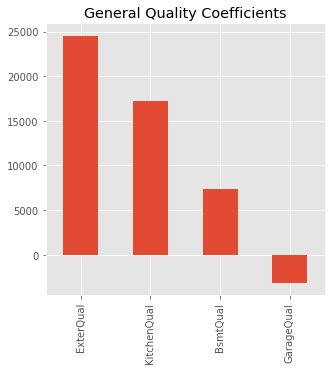

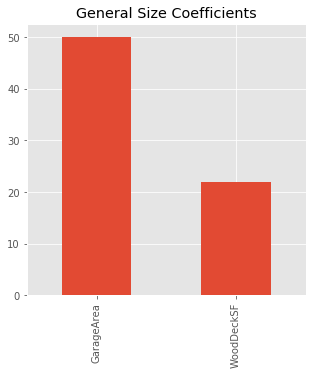

In [182]:
plt.rcParams['figure.figsize'] = (5,5)
results_at2.params[['ExterQual','BsmtQual', 'GarageQual', 'KitchenQual']].sort_values(ascending=False).plot.bar()
plt.title("General Quality Coefficients")
plt.show()
results_at2.params[['GarageArea', 'WoodDeckSF' ]].sort_values(ascending=False).plot.bar()
plt.title("General Size Coefficients")
plt.show()


In [60]:
from sklearn.linear_model import LinearRegression
lm_at = LinearRegression()
lm_at.fit(Xtrain_at, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
lm_at.score(Xtrain_at, ytrain)

0.860591404260173

lm_at.score(Xtest_at, ytest)

In [62]:
lm_at.score(Xtest_at, ytest)

0.8412783515268265

In [63]:
from sklearn.model_selection import cross_val_score
cv3_train_at=(cross_val_score(lm_at, Xtrain_at, ytrain, cv=3))

In [64]:
cv3_train_at

array([0.8494951 , 0.8635617 , 0.85472627])

In [67]:
print(f'CV mean: {np.mean(cv3_train_at)}')
np.std(cv3_train_at)

CV mean: 0.8559276920801175


0.005805161957893271

In [66]:
np.mean(cv3_train_at)

0.8559276920801175